In [106]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from itertools import product

In [112]:
df = pd.read_csv('IRIS.csv')

list_of_species = df['species'].unique()
list_of_species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [119]:
MAKERS = { 'Iris-setosa' : "o", 'Iris-versicolor' : "s", 'Iris-virginica' : "^" }
COLORS = { 'Iris-setosa' : "r", 'Iris-versicolor' : "b", 'Iris-virginica' : "g" }

def plot_scatter_by_columns(columns):
    indices = list(product(columns, repeat=2))
    num_col = len(columns)
    matrix = [indices[num_col*i:num_col*(i+1)] for i in range(num_col)]

    _, ax = plt.subplots(nrows=num_col,ncols=num_col, figsize=(4*num_col,4*num_col))

    for i in range(num_col):
        for j in range(num_col):
            ref = ax[i,j]
            xlabel = matrix[i][j][0]
            ylabel = matrix[i][j][1]
            ref.set_xlabel(xlabel)
            ref.set_ylabel(ylabel)

            for specie in list_of_species:
                xs = df.loc[df['species'] == specie,[xlabel]]
                ys = df.loc[df['species'] == specie,[ylabel]]
                ref.scatter(xs,ys,color=COLORS[specie], marker=MAKERS[specie])


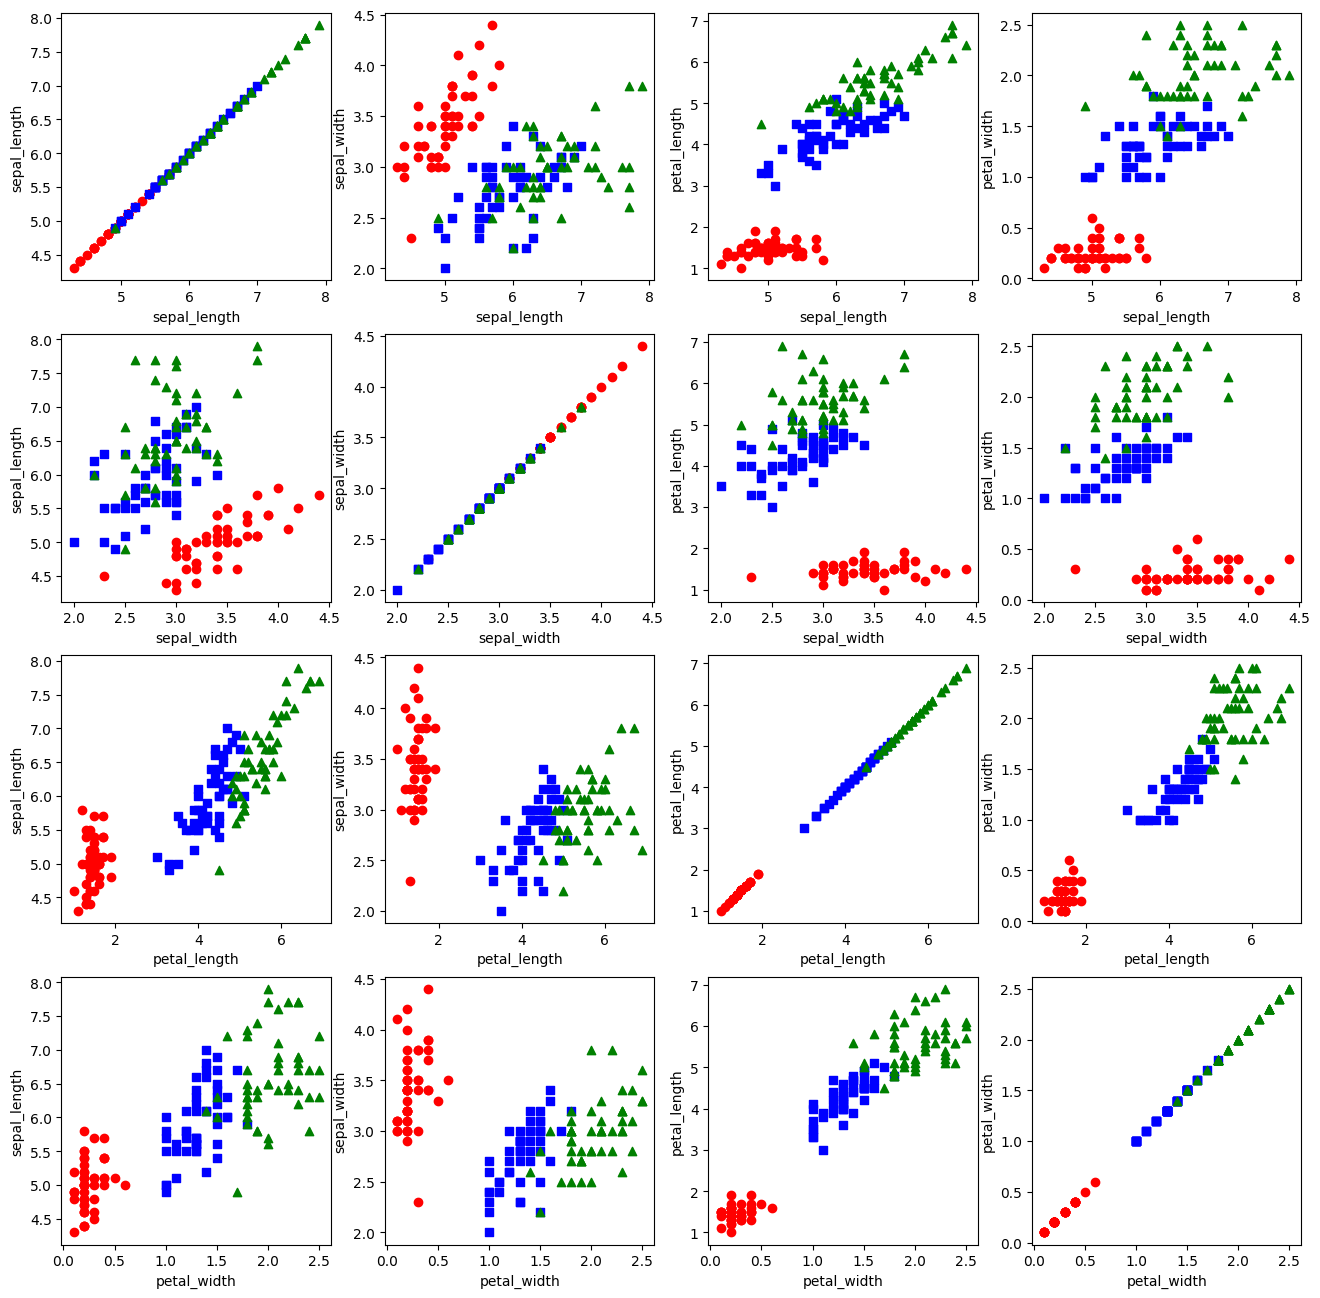

In [120]:
columns = df.columns.values
columns = columns[(columns != 'species') & (columns != 'sepal_area')]
plot_scatter_by_columns(columns)

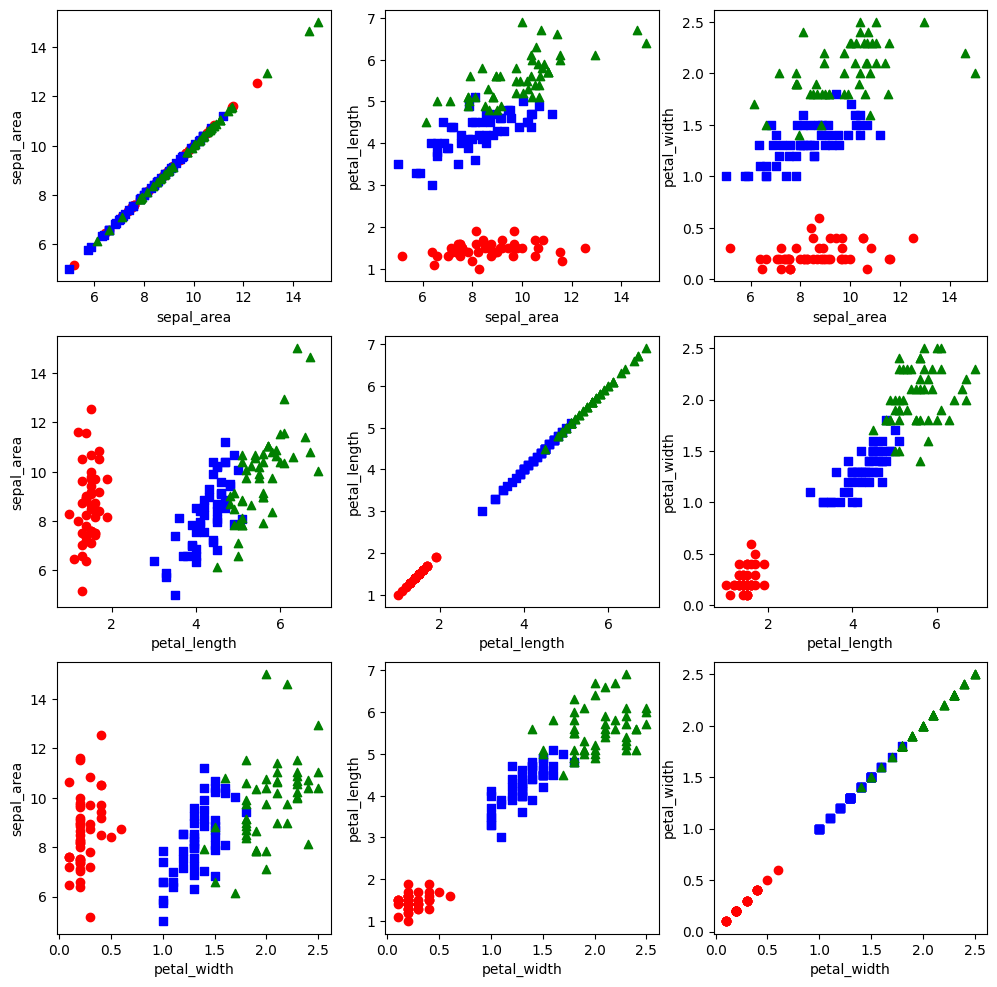

In [121]:
df['sepal_area'] = (df['sepal_length']*df['sepal_width'])/2

columns = ['sepal_area','petal_length', 'petal_width']
plot_scatter_by_columns(columns)


In [168]:
def partition_data(data, prop):
    results = [[],[]]
    for item in data: 
        results[0 if np.random.random() < prop else 1].append(item)

    return results

def euclidean_distance(x,y):
    return np.linalg.norm(x-y)

class NearestNeighbors:
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def classify(self, p, k=1, distanceFn=euclidean_distance):

        distances = [distanceFn(x_i,p) for x_i in self.X]
        
        ziped_dist_y = list(zip(distances,self.Y))
        print(sorted(distances)) 
        test = sorted(ziped_dist_y,key=lambda item: item[0])

        print(test)        


In [160]:
X = np.array(df[['sepal_area','petal_length','petal_width']])
Y = np.array(df['species'])

data = list(zip(X,Y))

train_data, test_data = partition_data(data,0.7)

train_data_x, train_data_y = (zip(*train_data))
test_data_x, test_data_y = (zip(*test_data))


In [169]:
knn = NearestNeighbors(train_data_x,train_data_y)

knn.classify(test_data_x[0])

[0.009999999999998899, 0.18027756377320048, 0.19723082923316007, 0.21931712199461284, 0.24166091947189206, 0.26248809496813386, 0.2828869031963128, 0.2828869031963128, 0.2828869031963128, 0.4805205510693574, 0.7566372975210778, 0.8343260753446456, 0.8999999999999995, 0.9539392014169468, 0.9700000000000006, 1.1463965282571285, 1.154339638061519, 1.1842719282327006, 1.4696938456699062, 1.4899999999999993, 1.5749999999999984, 1.5781714102086613, 1.8436105879496345, 1.8544271352630701, 2.0786113152775827, 2.0969561273426773, 2.2771967416101746, 2.3442696090680344, 2.401166383239611, 2.457035815774771, 2.531975513309716, 2.548038461248182, 2.5773823930491955, 2.609597670139978, 2.641893260523598, 2.670674072214729, 2.6800186566514794, 2.7350319925002706, 2.792651070219837, 2.8217902119044926, 3.098790086469233, 3.144395808418527, 3.1685959035509725, 3.1878519413548685, 3.1970337814918386, 3.200374978029919, 3.2062439083762797, 3.2515380975778223, 3.34916407481031, 3.4030721414627694, 3.4322